# DIABETES PREDICTION MODEL (Using Logistic Regression)

This project focuses on building a machine learning model to predict the likelihood of diabetes in patients using the PIMA Indians Diabetes Dataset. Although the initial plan was to implement a Support Vector Machine (SVM) classifier, multiple models were trained and evaluated to identify the most effective approach. After comprehensive training and performance comparison, Logistic Regression emerged as the best-performing model, achieving an accuracy of 78%.

## PROBLEM STATEMENT AND MOTIVATION
Diabetes is a condition where the body cannot properly control blood sugar levels, which can lead to serious health problems. Early prediction helps prevent complications and allows timely intervention for high-risk individuals.
Machine learning can analyze patient data to identify patterns and predict diabetes efficiently, supporting faster and more accurate decision making.

> Why Machine Learning?

Machine learning techniques provide an efficient way to analyze medical datasets, uncover underlying patterns, and make accurate predictions. By applying predictive models to patient data, healthcare decision-making can be enhanced through faster and more reliable risk assessment.


## Model Selection and Rationale

Initially, a Support Vector Machine (SVM) model was selected due to its effectiveness in handling complex and high-dimensional data. However, to ensure optimal performance, three different classification models were trained and evaluated:

- Logistic Regression

- Random Forest Classifier

- Support Vector Machine (SVM)

The Random Forest Classifier performed poorly relative to the other models, which may be attributed to the small dataset size and potential overfitting. Both SVM and Logistic Regression demonstrated strong predictive performance, but Logistic Regression achieved the highest accuracy of 78%, making it the most suitable model for this task.


## About the Dataset
This dataset originates from the National Institute of Diabetes and Digestive and Kidney Diseases. The data was carefully selected from a larger database, with specific criteria: all patients are female, at least 21 years old, and of Pima Indian heritage.

The dataset includes multiple medical predictor variables such as the number of pregnancies, BMI, insulin level, and age along with a taget variable, Outcome, which indicates the presence or absence od Diabetes.

In [745]:
# Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

## Data Collection and Analysis

PIMA Diabetes Dataset

In [746]:
# Loading the Dataset
diabetes_dataset = pd.read_csv('/content/diabetes.csv')
diabetes_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [747]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [748]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [749]:
# checking the unique values
variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']
for i in variables:
  print(diabetes_dataset[i].unique())

[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
[35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8
 49 63 99]
[  0  94 168  88 543 846 175 230  83  96 235 

In the dataset all the variables except Pregnancies and Outcome cannot have a value of 0, as it is not possible to have a glucose level or blood pressure of zero. Such values are therefore considered invalid or incorrect data.

In [750]:
# Checking the count of value 0 in the variables
variables = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for i in variables:
    c = 0
    for x in diabetes_dataset[i]:
        if x == 0:
            c += 1
    print(i, c)

Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0


Now I have to replace all the incorrect values

In [751]:
# replacing the missing values with the mean
variables = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for i in variables:
  diabetes_dataset[i].replace(0, diabetes_dataset[i].mean(), inplace=True)

/tmp/ipython-input-606313552.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_dataset[i].replace(0, diabetes_dataset[i].mean(), inplace=True)


In [752]:
# checking to make sure that the incorrect values are replaced
for i in variables:
    c = 0
    for x in diabetes_dataset[i]:
        if x == 0:
            c += 1
    print(i, c)

Glucose 0
BloodPressure 0
SkinThickness 0
Insulin 0
BMI 0


### Checking for missing values


In [753]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


### Descriptive Statistics

In [754]:
# getting the statistical measures of data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [755]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [756]:
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


0 --> Non-Diabetic

1 --> Diabetic

In [757]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.705367,70.810008,25.373135,106.457354,30.880066,0.429734,31.190000
1,4.865672,142.159661,74.950326,28.907494,141.426597,35.381288,0.550500,37.067164


## Exploratory Data Analysis

During the EDA, I'll be exploring how the data is distributed, investigate patterns and correlations among the features, and examine how each feature relates to the target variable. The process will begin by analyzing the overall distribution of the data, and then move on to study the relationships between the independent variables and the outcome.

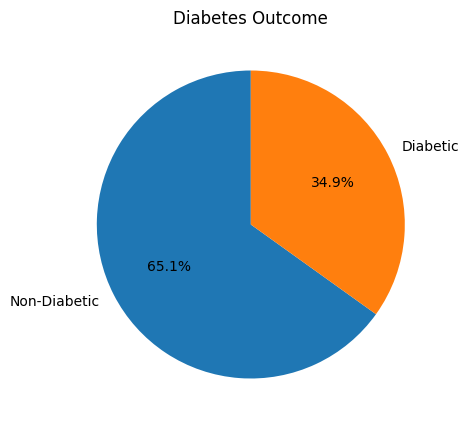

In [758]:
plt.figure(figsize=(6, 5))
plt.pie(diabetes_dataset['Outcome'].value_counts(), labels=['Non-Diabetic', 'Diabetic'], autopct='%1.1f%%', startangle=90)
plt.title('Diabetes Outcome')
plt.show()

## Age Distribution and Diabetes

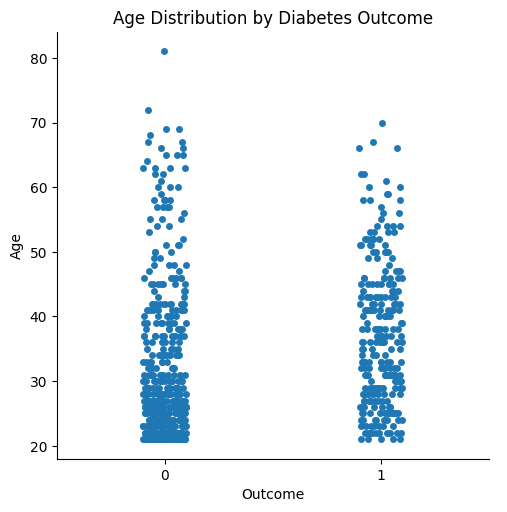

In [801]:
sns.catplot(
    x='Outcome',
    y='Age',
    data=diabetes_dataset,
    kind='strip',
    jitter=True,
    size=5
)

plt.title('Age Distribution by Diabetes Outcome')
plt.show()

The graph shows that most patients are adults between 20 and 30 years old. While individuals aged 40 and 50 years appear more susceptible to diabetes, the higher number of adults in the 20-30 gap group results in a greater overall count of diabetes cases within the younder group.

## Pregnancies and Diabetes

<Axes: xlabel='Outcome', ylabel='Pregnancies'>

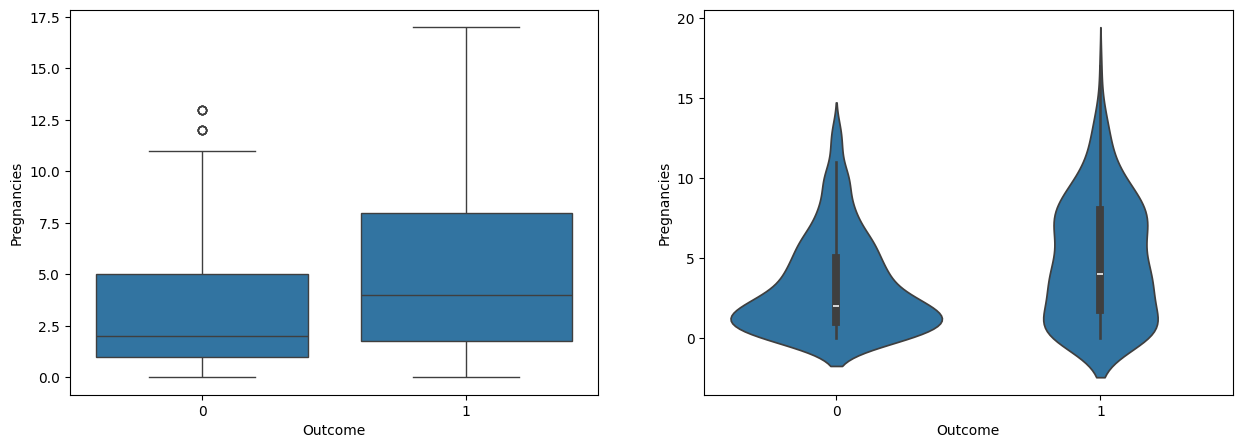

In [760]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Outcome',y='Pregnancies',data=diabetes_dataset,ax=ax[0])
sns.violinplot(x='Outcome',y='Pregnancies',data=diabetes_dataset,ax=ax[1])

Both reveal an interesting relationship between the number of pregnancies and diabetes. The graphs suggest that a higher number of pregnancies is associated with an increased risk of developing diabetes.

## Glucose and Diabetes

Text(0.5, 1.0, 'Glucose and Diabetes')

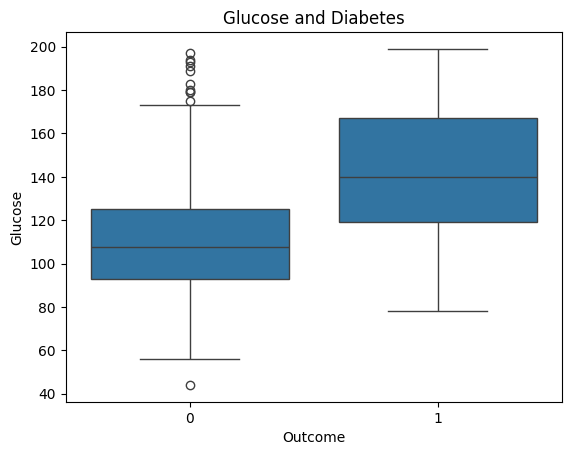

In [761]:
sns.boxplot(x='Outcome', y='Glucose', data=diabetes_dataset).set_title('Glucose and Diabetes')

Glucose levels plays a major role in determining whether the patient is diabetic or not. Patients with a median glucose level below 120 are more likely to be non-diabetic, while those with a median glucose level above 140 are more likely to be diabetic. Therefore, high glucose levels are a strong indicator of diabetes.

## Blood Pressure and Diabetes

Text(0.5, 1.0, 'Blood Pressure and Diabetes')

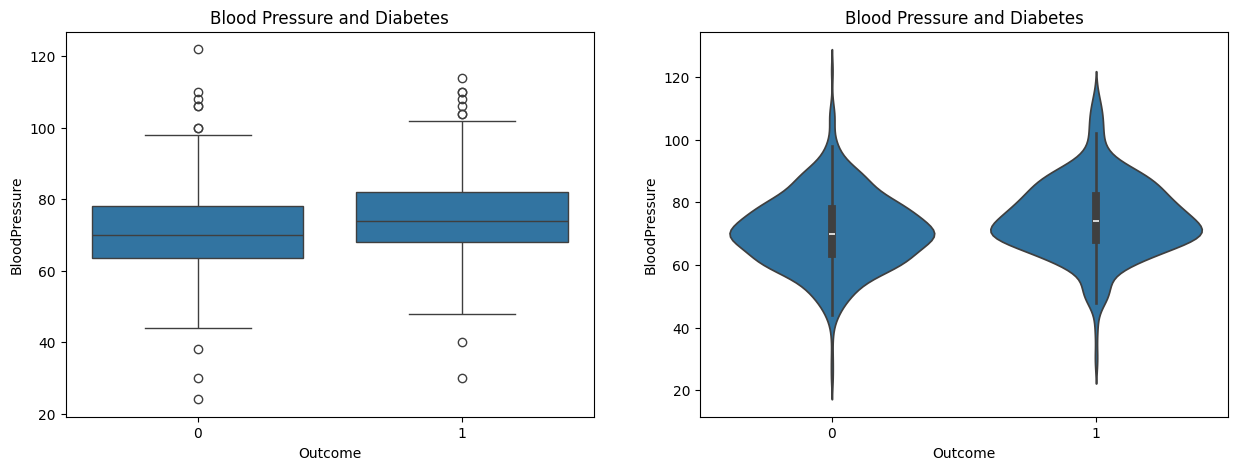

In [762]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Outcome', y='BloodPressure', data=diabetes_dataset, ax=ax[0]).set_title('Blood Pressure and Diabetes')
sns.violinplot(x='Outcome', y='BloodPressure', data=diabetes_dataset, ax=ax[1]).set_title('Blood Pressure and Diabetes')

The boxplot and violin plot show that diabeticpatients have slightly higher blood pressure than non-diabetic patients. However, the difference is small and blood pressure alone is not a strong predictor of diabetes.

## Skin Thickness and Diabetes

Text(0.5, 1.0, 'Skin Thickness and Diabetes')

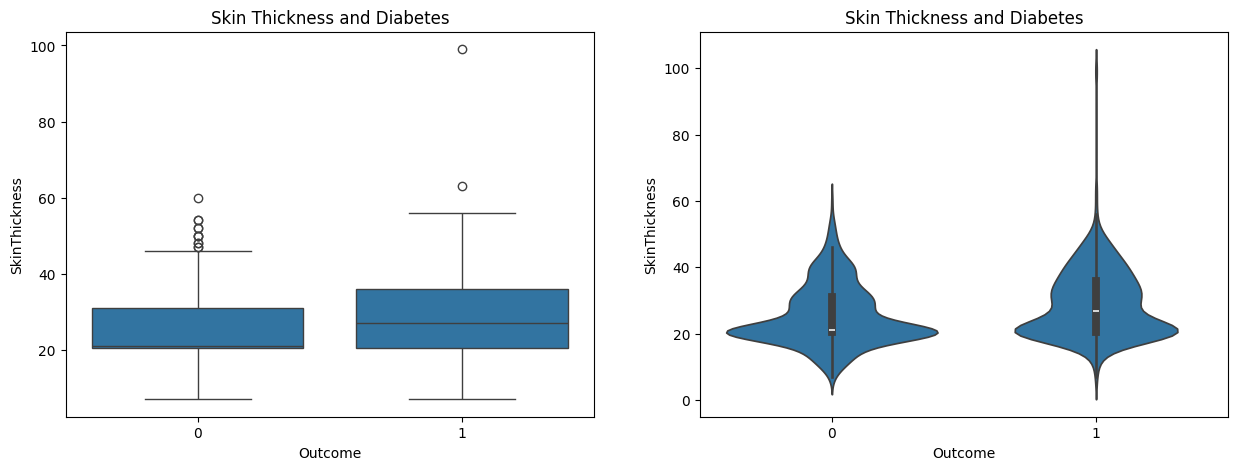

In [763]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Outcome', y='SkinThickness', data=diabetes_dataset, ax=ax[0]).set_title('Skin Thickness and Diabetes')
sns.violinplot(x='Outcome', y='SkinThickness', data=diabetes_dataset, ax=ax[1]).set_title('Skin Thickness and Diabetes')

Both the boxplot and violin plot show the effect of diabetes on skin thickness. The boxplot indicates that diabetic patients have a higher median skin thickness(around 30) compared to non-diabetic patients (around 20). The violin plot also shows a higher distribution of skin thickness values around 30 for diabetic patients. Therefore, skin thickness can be an indicator of diabetes.

## Insulin and Diabetes

Text(0.5, 1.0, 'Insulin and Diabetes')

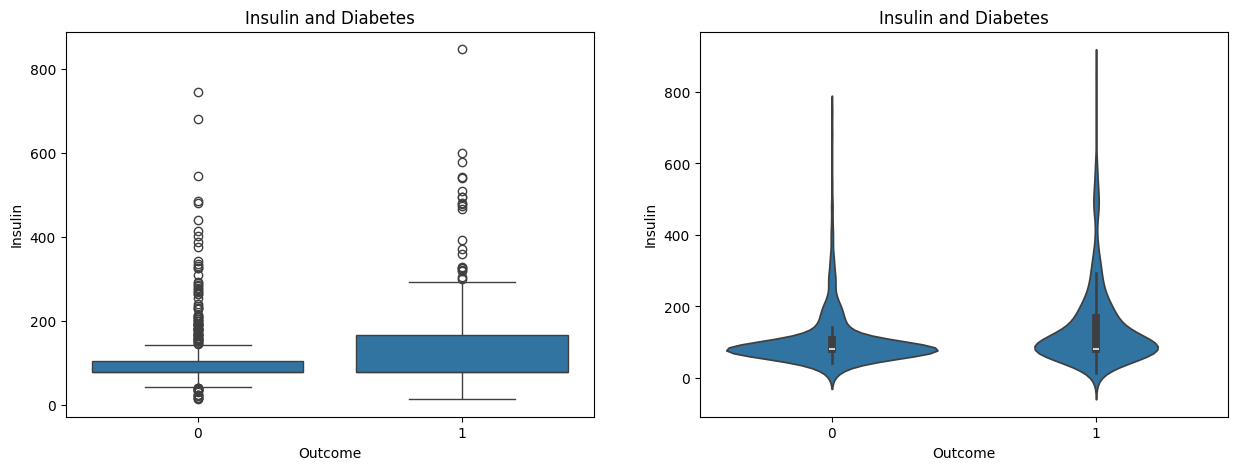

In [764]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Outcome', y='Insulin', data=diabetes_dataset, ax=ax[0]).set_title('Insulin and Diabetes')
sns.violinplot(x='Outcome', y='Insulin', data=diabetes_dataset, ax=ax[1]).set_title('Insulin and Diabetes')

Insulin is a key hormone that regulates glucose metabolism. The boxplot and violin plot show that non-diabetic patients have insulin levels around 100, while diabetic patients have higher levels around 200. The violin plot also indicates a more concentrated distribution at higher insulin levels for diabetic patients. This suggests that insulin level is a good indicator.

## BMI and Diabetes

Text(0.5, 1.0, 'BMI and Diabetes')

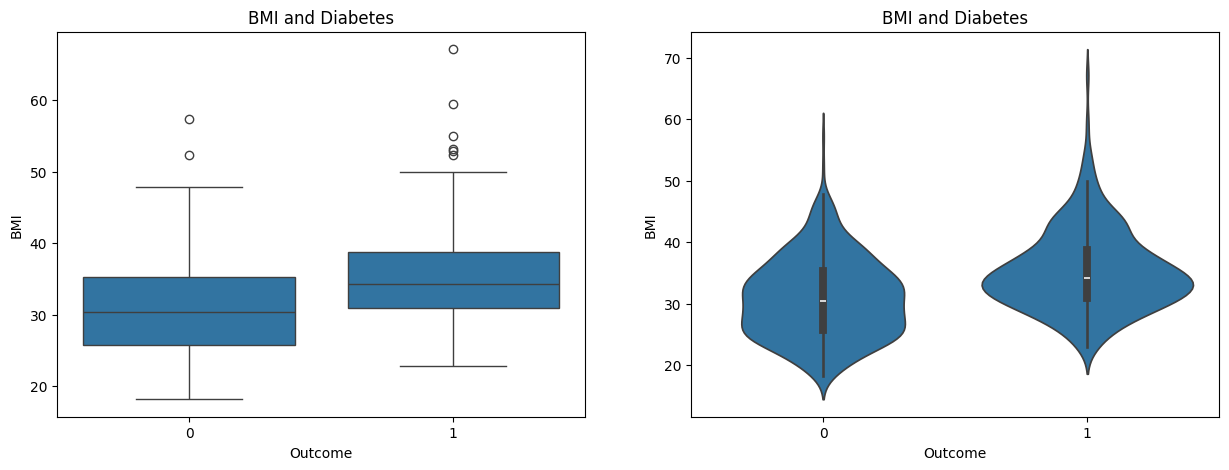

In [765]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Outcome', y='BMI', data=diabetes_dataset, ax=ax[0]).set_title('BMI and Diabetes')
sns.violinplot(x='Outcome', y='BMI', data=diabetes_dataset, ax=ax[1]).set_title('BMI and Diabetes')

Both plots highlight the role of BMI in diabetes prediction. Non-diabetic patients mostly have BMI values between 25 and 35, while diabetic patients tend to have higher BMI values above 35. The violin plot shows greater distribution at higher BMI ranges for diabetic patients. This indicates that BMI is a strong predictor of diabetes, with obese individuals being more likely to be diabetic.

## Diabetes Pedigree Function and Diabetes Outcome

Text(0.5, 1.0, 'Diabetes Pedigree Function and Diabetes Outcome')

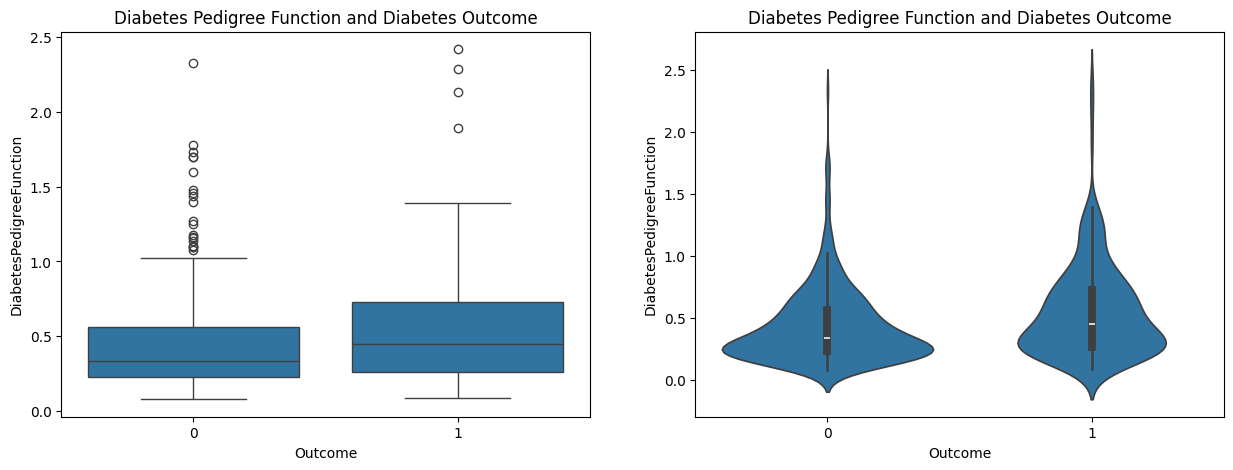

In [766]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=diabetes_dataset, ax=ax[0]).set_title('Diabetes Pedigree Function and Diabetes Outcome')
sns.violinplot(x='Outcome', y='DiabetesPedigreeFunction', data=diabetes_dataset, ax=ax[1]).set_title('Diabetes Pedigree Function and Diabetes Outcome')

The Diabetes Pedigree Function (DPF) estimates diabetes risk based on family history and age. The boxplot shows that patients with lower DPF values are less likely to be diabetic, while higher DPF values are associated with diabetes. The violin plot indicates that non-diabetic patients mostly have DPF values between 0.25 and 0.35 whereas diabetic patients show higher and more spread-out DPF values. This suggest that DPF is a good indicator of diabetes.

## Correlation Matrix Heatmap

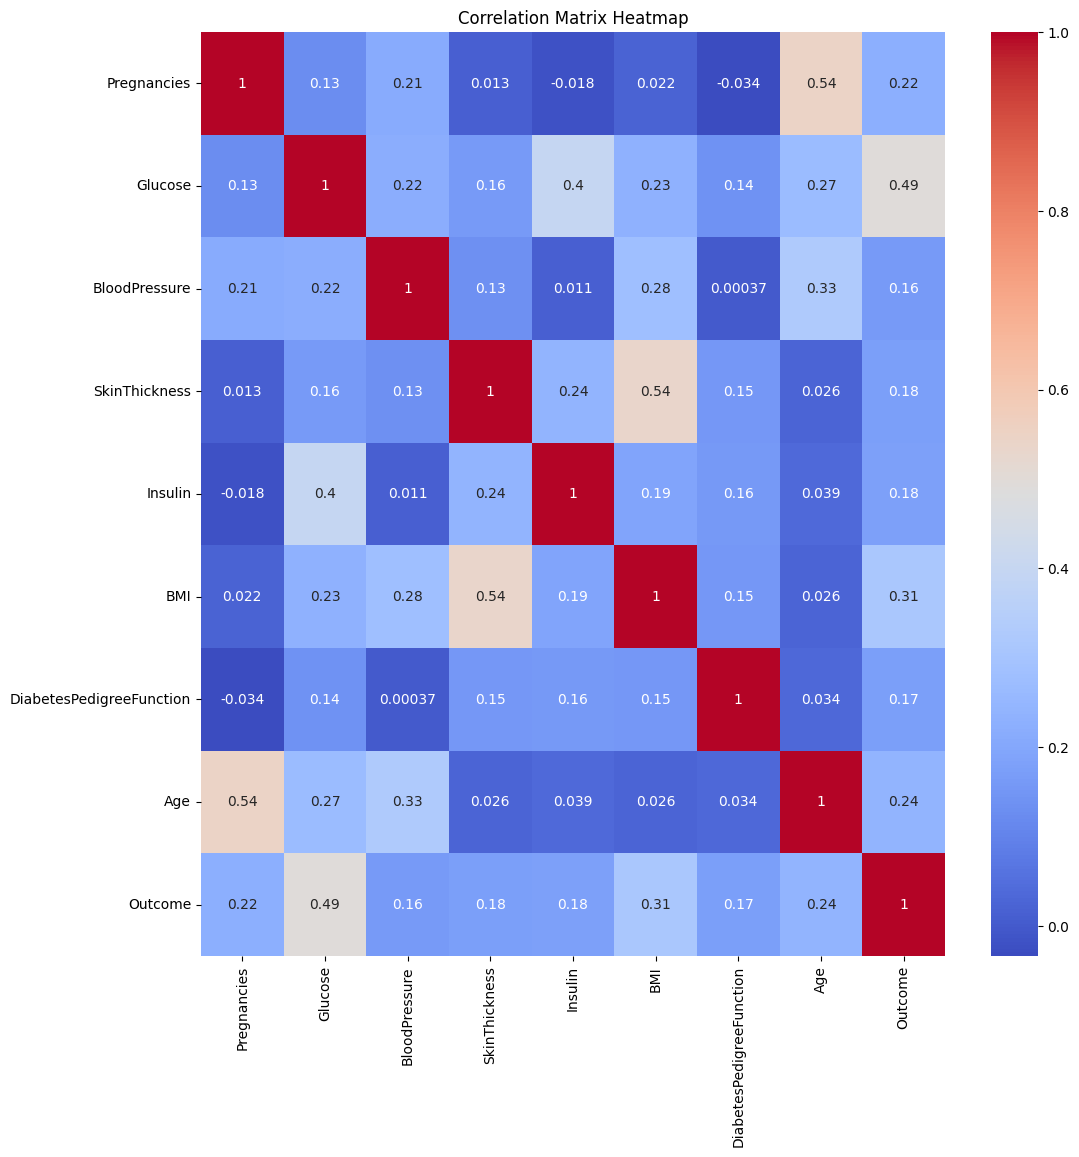

In [767]:
plt.figure(figsize=(12, 12))
sns.heatmap(diabetes_dataset.corr(), annot=True, cmap='coolwarm').set_title('Correlation Matrix Heatmap')
plt.show()

## Train, Test, Split

Data Standardization

In [768]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

# Split first
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=2
)

# Scale after splitting
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [769]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


For predicting diabetes, the following algorithms will be used;

1. Logistic Regression
2. Support Vector Machine
3. Random Forest Classifier(optional)

### 1. Logistic Regression

In [770]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg

LogisticRegression()

In [771]:
# training the model
logreg.fit(X_train, Y_train)

LogisticRegression()

In [772]:
# training accuracy
logreg.score(X_train, Y_train)

0.7850162866449512

In [773]:
# accuracy score on the test data
X_test_prediction = logreg.predict(X_test)
test_data_accuracy = logreg.score(X_test, Y_test)

In [774]:
print('Accuracy score of the test data : ', training_data_accuracy)

Accuracy score of the test data :  0.7817589576547231


In [775]:
# predicted outcomes
logreg_pred = logreg.predict(X_test)
logreg_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1])

## 2. Support Vector Machine

In [776]:
classifier = svm.SVC(kernel='linear', random_state=0)

In [777]:
# training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

In [778]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [779]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7817589576547231


In [780]:
# accuracy score on the test data
svm_pred = classifier.predict(X_test)
test_data_accuracy = classifier.score(X_test, Y_test)

In [781]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7792207792207793


## Random Forest Classifier

In [782]:
#buidling model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,random_state=42)
rfc

RandomForestClassifier(random_state=42)

In [783]:
#training model
rfc.fit(X_train, Y_train)
#training accuracy
rfc.score(X_train, Y_train)

1.0

In [784]:
#predicted outcomes
rfc_pred = rfc.predict(X_test)
test_data_accuracy = rfc.score(X_test, Y_test)

In [785]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7402597402597403


performed poorly, DROPPED!!!

# Model Evaluation

## Evaluating Logistic Regression model

### Confusion Matrix Heatmap

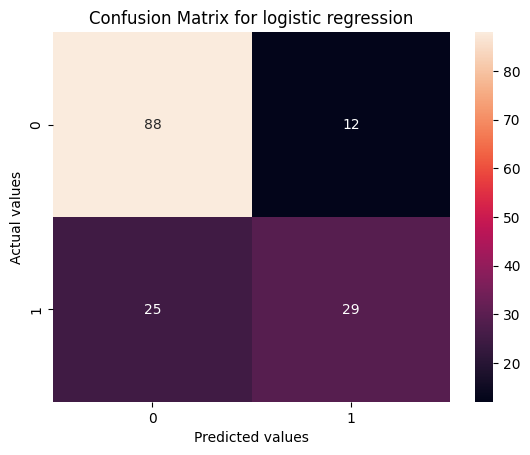

In [786]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(Y_test, logreg_pred), annot=True, fmt='g')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for logistic regression')
plt.show()

The diagonal cells show the number of correct predictions for each class, with predicted values on the top and actual values on the left. The off-diagonal cells represent incorrect predictions.

### Distribution plot

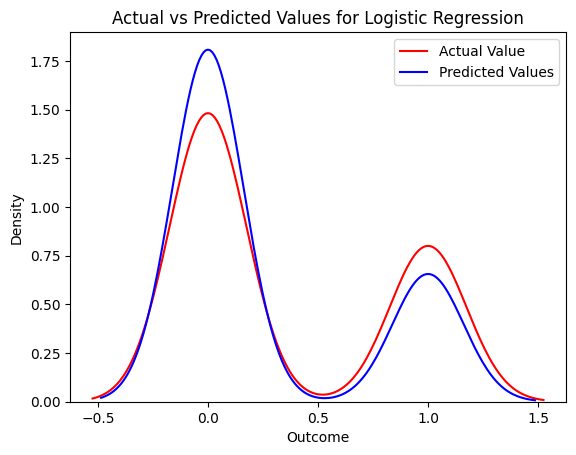

In [796]:

import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.kdeplot(Y_test, color="r", label="Actual Value")
sns.kdeplot(logreg_pred, color="b", label="Predicted Values", ax=ax)

plt.title('Actual vs Predicted Values for Logistic Regression')
plt.xlabel('Outcome')
plt.ylabel('Density')
plt.legend()
plt.show()

The prediction plots visualize the model's accuracy, where red represents actual values and blue represents predicted values. Greater overlap between the two indicates better model performance.

In [788]:
## Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       100
           1       0.71      0.54      0.61        54

    accuracy                           0.76       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.75      0.76      0.75       154



## Evaluating SVM Model

Confusion Matrix Heatmap

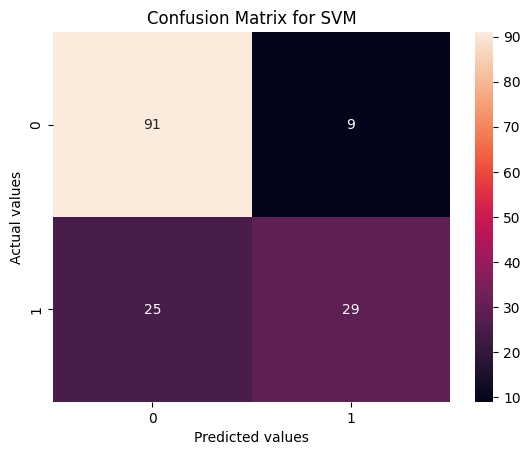

In [789]:
sns.heatmap(confusion_matrix(Y_test, svm_pred), annot=True, fmt='g')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for SVM')
plt.show()

### Distribution Plot

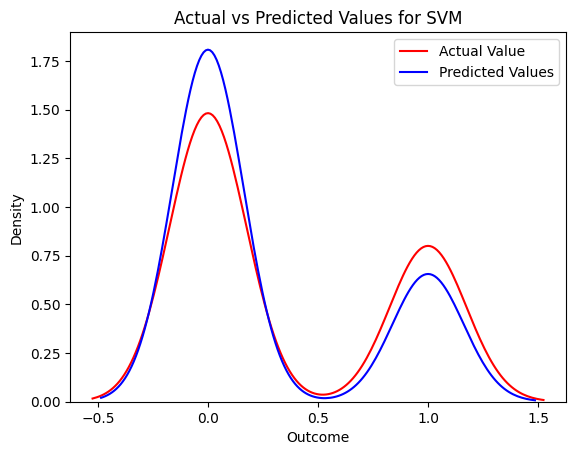

In [797]:
ax = sns.kdeplot(Y_test, color="r", label="Actual Value")
sns.kdeplot(X_test_prediction, color="b", label="Predicted Values", ax=ax)

plt.title('Actual vs Predicted Values for SVM')
plt.xlabel('Outcome')
plt.ylabel('Density')
plt.legend()
plt.show()

  ### Classification Report

In [791]:
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       100
           1       0.71      0.54      0.61        54

    accuracy                           0.76       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.75      0.76      0.75       154



In [792]:
print("Accuracy Score:", accuracy_score(Y_test, X_test_prediction))
print("Mean Squared Error:", mean_squared_error(Y_test, X_test_prediction))
print("Mean Absolute Error:", mean_absolute_error(Y_test, X_test_prediction))
print("R2 Score:", r2_score(Y_test, X_test_prediction))


Accuracy Score: 0.7597402597402597
Mean Squared Error: 0.24025974025974026
Mean Absolute Error: 0.24025974025974026
R2 Score: -0.05518518518518545


## Comparing the Models

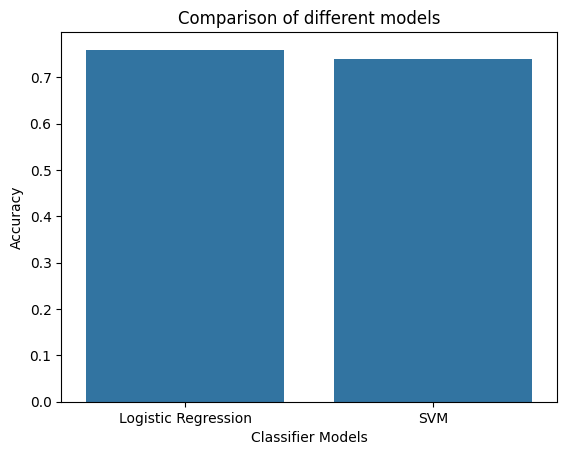

In [793]:
from sklearn.metrics import accuracy_score

# Get Logistic Regression accuracy on test data
logreg_test_accuracy = accuracy_score(Y_test, logreg_pred)

# Get SVM accuracy on test data (already stored in test_data_accuracy)
svm_test_accuracy = test_data_accuracy

sns.barplot(x=['Logistic Regression', 'SVM'],
            y=[logreg_test_accuracy, svm_test_accuracy])
plt.xlabel('Classifier Models')
plt.ylabel('Accuracy')
plt.title('Comparison of different models')
plt.show()

Making a Predictive System

In [794]:
#input_data = (5,166,72,19,175,25.8,0.587,51)
input_data = (10,168,74,0,0,38,0.537,34)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = logreg.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 1.82644088  1.50095686  0.10929755 -2.73328263 -1.24398558  0.76884586
   0.19891792  0.06325943]]
[1]
The person is diabetic


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


The prediction is correct!!!

## Model Performance and Results

After evaluation, Logistic Regression achieved an accuracy of 78%, outperforming both SVM and Random Forest. The results indicate that key factors such as glucose level, BMI, insulin level, and number of pregnancies play significant roles in predicting diabetes risk.

## Conclusion

This project demonstrates the effectiveness of machine learning in predicting diabetes risk using clinical data. Through systematic model comparison, Logistic Regression was identified as the most suitable model for this dataset. The study highlights the importance of evaluating multiple algorithms and shows that simpler models can outperform more complex ones when data is limited.

Future work may involve incorporating larger and more diverse datasets, testing advanced ensemble techniques, and deploying the model in real-world healthcare applications to support early diabetes screening.